In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import numpy as np
from scipy import stats

In [110]:
tiempo = 'Tiempo de ejecución (en nanosegundos)'
n = 'n'
m = 'm'
ns = 'ns'

# Implementación por fuerza bruta

In [111]:
dfExact = pd.read_csv('exact.csv')
dfExact = dfExact.groupby([n, m]).min().reset_index()
dfExactComplete = pd.read_csv('exact-complete.csv')
dfExactComplete = dfExactComplete.groupby([n, m]).min().reset_index()

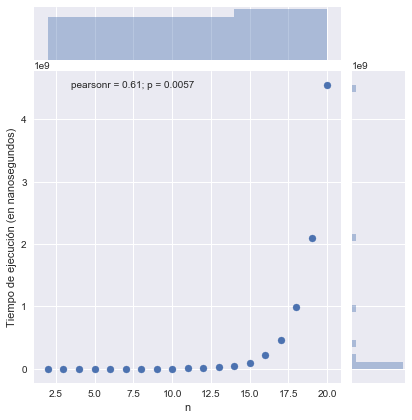

In [112]:
g = sns.jointplot(
    x=n, y=ns, data=dfExactComplete
)
g.set_axis_labels(xlabel=n, ylabel=tiempo)

plt.show()

# Implementación golosa

In [113]:
dfGreedy = pd.read_csv('greedy.csv')
dfGreedy = dfGreedy.groupby([n, m]).min().reset_index()

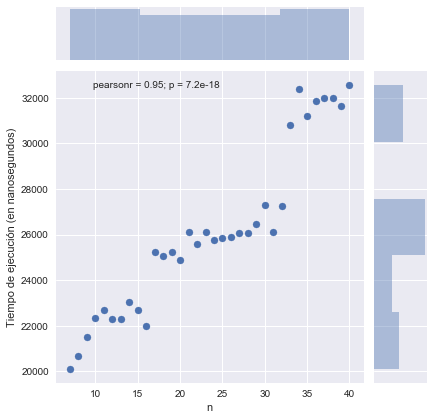

In [114]:
dfGreedyA = dfGreedy[(dfGreedy.n > 0) & (dfGreedy.m == 20)]

g = sns.jointplot(
    x=n, y=ns, data=dfGreedyA
)
g.set_axis_labels(xlabel=n, ylabel=tiempo)

plt.show()

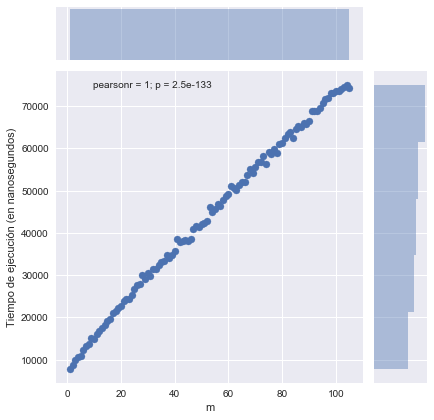

In [115]:
dfGreedyB = dfGreedy[(dfGreedy.n == 15) & (dfGreedy.m > 0)]

g = sns.jointplot(
    x=m, y=ns, data=dfGreedyB
)
g.set_axis_labels(xlabel=m, ylabel=tiempo)

plt.show()

# Implementación local

In [116]:
dfLocal = pd.read_csv('local.csv')
dfLocal = dfLocal.groupby([n, m]).min().reset_index()

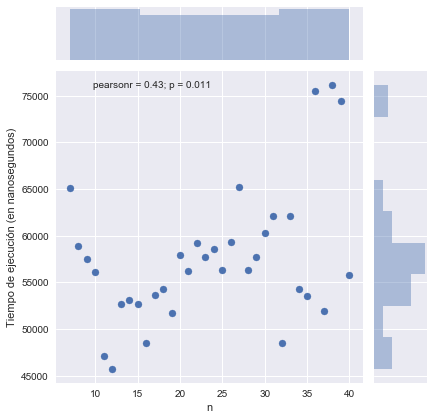

In [117]:
dfLocalA = dfLocal[(dfLocal.n > 0) & (dfLocal.m == 20)]

g = sns.jointplot(
    x=n, y=ns, data=dfLocalA
)
g.set_axis_labels(xlabel=n, ylabel=tiempo)

plt.show()

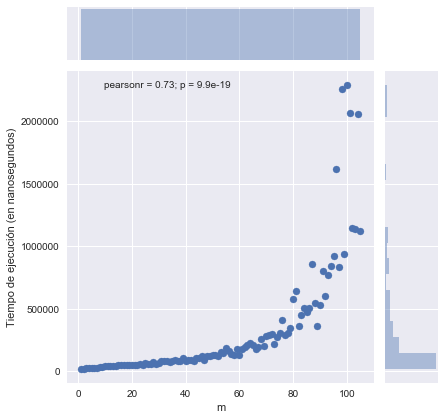

In [118]:
dfLocalB = dfLocal[(dfLocal.n == 15) & (dfLocal.m > 0)]

g = sns.jointplot(
    x=m, y=ns, data=dfLocalB
)
g.set_axis_labels(xlabel=m, ylabel=tiempo)

plt.show()

# Implementación GRASP
## Seba se la come

In [119]:
dfGraspIt = pd.read_csv('grasp-it.csv')
dfGraspIt = dfGraspIt.groupby([n, m, "p", "it"]).min().reset_index()
dfGraspP = pd.read_csv('grasp-p.csv')
dfGraspP = dfGraspP.groupby([n, m, "p", "it"]).min().reset_index()
dfGrasp = pd.read_csv('grasp.csv')
dfGrasp = dfGrasp.groupby([n, m, "p", "it"]).min().reset_index()

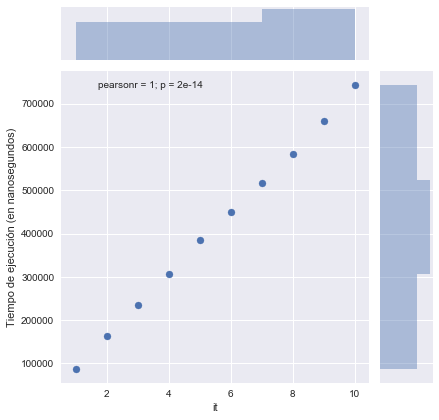

In [120]:
dfGraspA = dfGraspIt[(dfGraspIt.n == 10) & (dfGraspIt.m == 20)
                     & (dfGraspIt.p == 0.5) & (dfGraspIt.it > 0)]

g = sns.jointplot(
    x="it", y=ns, data=dfGraspA
)
g.set_axis_labels(xlabel="it", ylabel=tiempo)

plt.show()

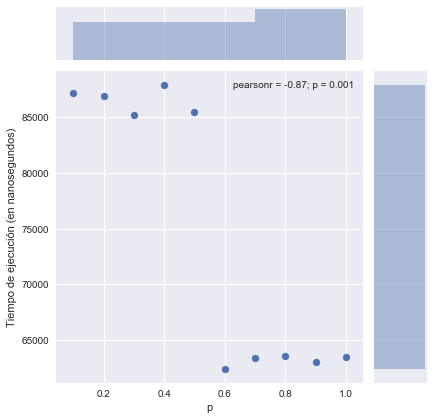

In [121]:
dfGraspB = dfGraspP[(dfGraspP.n == 10) & (dfGraspP.m == 20) & (dfGraspP.p > 0)]

g = sns.jointplot(
    x="p", y=ns, data=dfGraspB
)
g.set_axis_labels(xlabel="p", ylabel=tiempo)

plt.show()

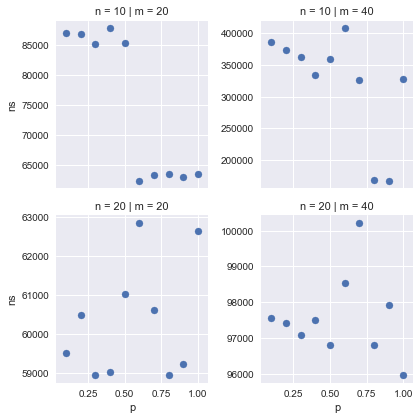

In [122]:
dfGraspC = dfGraspP[((dfGraspP.n == 10) | (dfGraspP.n == 20))
                    & ((dfGraspP.m == 20) | (dfGraspP.m == 40))
                    & (dfGraspP.p > 0)]

g = sns.FacetGrid(
    col=m,
    row=n,
    data=dfGraspC,
    sharey=False
)

g.map(plt.scatter, "p", ns)

plt.show()

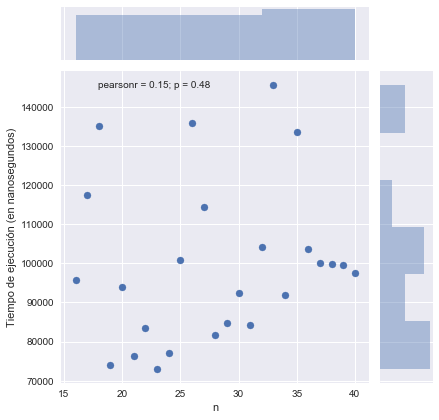

In [132]:
dfGraspD = dfGrasp[(dfGrasp.n > 15) & (dfGrasp.m == 40) & (dfGrasp.p == 0.5) & (dfGrasp.it == 1)]

g = sns.jointplot(
    x=n, y=ns, data=dfGraspD
)
g.set_axis_labels(xlabel=n, ylabel=tiempo)

plt.show()

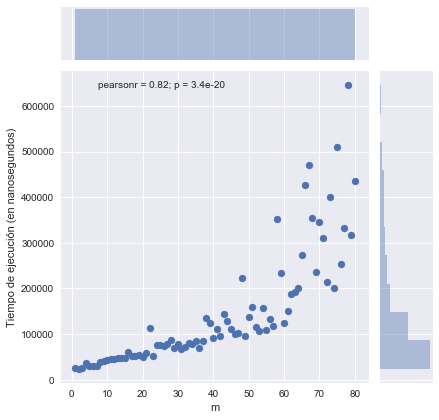

In [124]:
dfGraspE = dfGrasp[(dfGrasp.n == 15) & (dfGrasp.m > 0) & (dfGrasp.p == 0.5) & (dfGrasp.it == 1)]

g = sns.jointplot(
    x=m, y=ns, data=dfGraspE
)
g.set_axis_labels(xlabel=m, ylabel=tiempo)

plt.show()

# Fitteo de metaheuristica

In [125]:
dfFit = pd.read_csv('fit.csv')

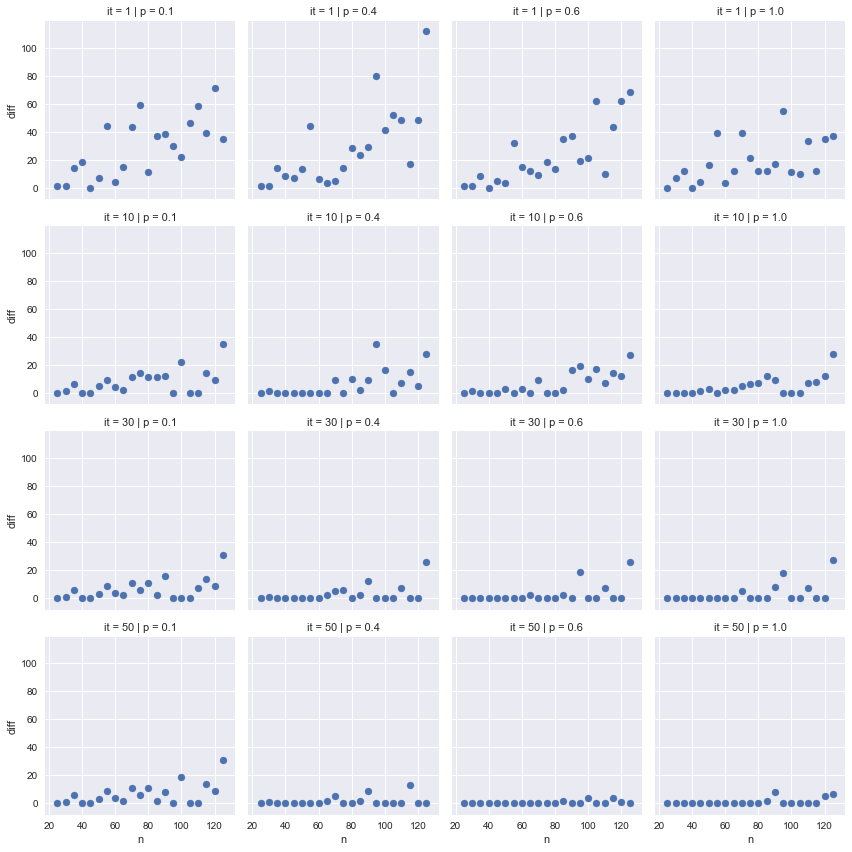

In [126]:
dfFitA = dfFit[((dfFit.p == 0.1) | (dfFit.p == 0.4) | (dfFit.p == 0.6) | (dfFit.p == 1))
              & ((dfFit.it == 1) | (dfFit.it == 10) | (dfFit.it == 30) | (dfFit.it == 50))]

plt.clf()
g = sns.FacetGrid(
    col="p",
    row="it",
    data=dfFitA
)

g.map(plt.scatter, n, "diff")

plt.show()

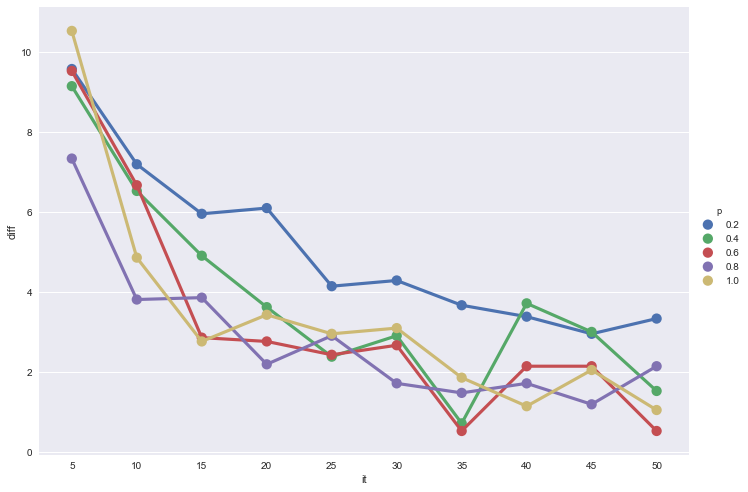

In [131]:
dfFitB = dfFit[
    ((dfFit.p == 0.2) | (dfFit.p == 0.4) | (dfFit.p == 0.6) | (dfFit.p == 0.8) | (dfFit.p == 1))
    & (dfFit.it % 5 == 0)]

g = sns.factorplot(
    x="it",
    y="diff",
    hue="p",
    data=dfFitB,
    size=7,
    aspect=1.4,
    ci=None
)
#g.set(xlabel="it", ylabel="mean(diff)")

plt.show()